In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(139)

class Transverse_Ising_Chain:
    def __init__(self, num_spins, J=1.0, dJ=1.0):
        self.num_spins = 8
        self.J = J
        self.dJ = dJ
        if not hasattr(self,'J_ij'):
            J_ij = self.J + (2 * self.dJ * np.random.rand(self.num_spins,self.num_spins) - self.dJ)
        self.energy_values = self.calculate_energy_values(J_ij)

    def calculate_energy_values(self, J_ij):
        self.spin_configurations = self.generate_spin_configurations(output_type='nobinary')
        hamiltonian_matrix = self.hamiltonian(J_ij)
        energy_values, energy_vectors = np.linalg.eigh(hamiltonian_matrix)
    
        return energy_values

    def generate_spin_configurations(self, output_type='binary'):
        binary_configurations = np.arange(2**self.num_spins)[:, None] >> np.arange(self.num_spins)[::-1] & 1
        if output_type == 'binary':
            return binary_configurations
        if output_type == 'nobinary':
            return (binary_configurations * 2 - 1)

    def sigma(self, original_state):
        new_state = np.tile(original_state, (self.num_spins, 1))
        np.fill_diagonal(new_state, 0)
        return new_state

    def hamiltonian(self, J_ij):
        transverse_field_strength = 1
        hamiltonian_matrix = np.zeros((2**self.num_spins, 2**self.num_spins))
        
        for i in range(2**self.num_spins):
            x = self.spin_configurations[i] * np.roll(self.spin_configurations[i], -1)
            isi_energy = -np.sum(J_ij * x)
            hamiltonian_matrix[i, i] = isi_energy
        
        hamiltonian_matrix[0, [1, 2]] = transverse_field_strength
        hamiltonian_matrix[1, [0, 3]] = transverse_field_strength
        hamiltonian_matrix[2, [0, 3]] = transverse_field_strength
        hamiltonian_matrix[3, [1, 2]] = transverse_field_strength
        
        return (hamiltonian_matrix.T)

    def mcmc(self, num_steps, beta, output_type='float'):
        current_state = 0
        running_average = np.zeros(num_steps)
        boltzmann_weights = np.exp(-beta * self.energy_values)
        
        for i in range(1, num_steps):
            proposed_state = np.random.choice(4)
            acceptance_probability = min(1, boltzmann_weights[proposed_state] / boltzmann_weights[current_state])
            random_number = np.random.uniform()
            
            if random_number <= acceptance_probability:
                current_state = proposed_state
            
            running_average[i] = running_average[i-1] + (1/i) * (self.energy_values[current_state] - running_average[i-1])
        
        if output_type == 'float':
            return running_average[-1]
        
        if output_type == 'array':
            return running_average

    def average_energy(self, beta):
        partition_function = np.sum(np.exp(-beta * self.energy_values))
        average_energy = np.sum(np.exp(-beta * self.energy_values) * self.energy_values) / partition_function

        x = self.mcmc(num_steps=1000,beta=1.0,output_type='array')
        x_range = np.linspace(0,1000,len(x))
        
        return average_energy
    

The numerical value for the expectation energy is -62.939529611818614
The analytic value for the expectation energy is -62.94168390736804


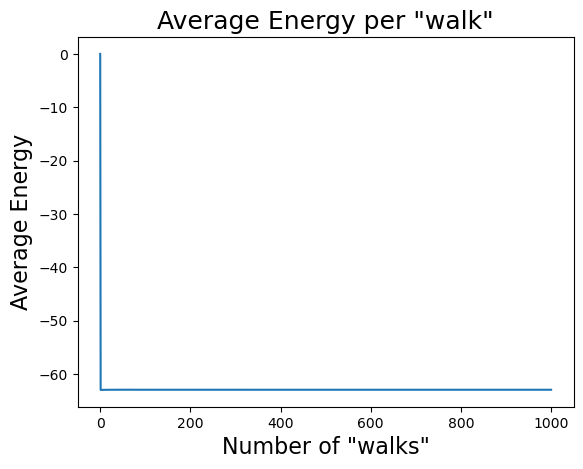

In [47]:
ising_chain = Transverse_Ising_Chain(num_spins=8)
print('The numerical value for the expectation energy is' , ising_chain.mcmc(num_steps=1000, beta=1.0, output_type = 'float'))
print('The analytic value for the expectation energy is' , ising_chain.average_energy(beta=1.0))

In [39]:
print(ising_chain.hamiltonian())

TypeError: Transverse_Ising_Chain.hamiltonian() missing 1 required positional argument: 'J_ij'

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(139)

class Transverse_Ising_Chain:
    def __init__(self, num_spins, J=0.5, dJ=0.5):
        self.num_spins = num_spins
        self.J = J
        self.dJ = dJ
        self.J_ij = self.J + (2 * self.dJ * np.random.rand(self.num_spins, self.num_spins) - self.dJ)
        self.energy_values = self.calculate_energy_values()

    def calculate_energy_values(self):
        spin_configurations = self.generate_spin_configurations()
        hamiltonian_matrix = self.hamiltonian(spin_configurations)
        energy_values, energy_vectors = np.linalg.eigh(hamiltonian_matrix)
        return energy_values

    def generate_spin_configurations(self):
        binary_configurations = np.arange(2**self.num_spins)[:, None] >> np.arange(self.num_spins)[::-1] & 1
        spin_configurations = binary_configurations * 2 - 1
        return spin_configurations
    
    def sigma(self, original_state):
        new_state = np.tile(original_state, (self.num_spins, 1))
        np.fill_diagonal(new_state, 0)
        return new_state

    def hamiltonian(self, spin_configurations):
        transverse_field_strength = 1
        hamiltonian_matrix = np.zeros((2**self.num_spins, 2**self.num_spins))
        
        for i in range(2**self.num_spins):
            x = spin_configurations[i] * np.roll(spin_configurations[i], -1)
            isi_energy = -np.sum(self.J_ij * x)
            hamiltonian_matrix[i, i] = isi_energy
        
        hamiltonian_matrix[0, [1, 2]] = transverse_field_strength
        hamiltonian_matrix[1, [0, 3]] = transverse_field_strength
        hamiltonian_matrix[2, [0, 3]] = transverse_field_strength
        hamiltonian_matrix[3, [1, 2]] = transverse_field_strength
        
        return hamiltonian_matrix.T

    def mcmc(self, num_steps, beta):
        current_state = 0
        running_average = np.zeros(num_steps)
        boltzmann_weights = np.exp(-beta * self.energy_values)
        
        for i in range(1, num_steps):
            proposed_state = np.random.choice(4)
            acceptance_probability = min(1, boltzmann_weights[proposed_state] / boltzmann_weights[current_state])
            random_number = np.random.uniform()
            
            if random_number <= acceptance_probability:
                current_state = proposed_state
            
            running_average[i] = running_average[i-1] + (1/i) * (self.energy_values[current_state] - running_average[i-1])
        
        return running_average[-1]

    def critical_temp(self, beta):
        partition_function = np.sum(np.exp(-beta * self.energy_values))
        average_energy_m_2 = np.sum(np.exp(-beta * self.energy_values) * self.energy_values**2) / partition_function
        average_energy_m_4 = np.sum(np.exp(-beta * self.energy_values) * self.energy_values**4) / partition_function
        binder_cumulant = 
        
        return average_energy
    
    def binder_cumulant(self, beta):
    partition_function = np.sum(np.exp(-beta * self.energy_values))
    average_m2 = np.sum(np.exp(-beta * self.energy_values) * self.energy_values**2) / partition_function
    average_m4 = np.sum(np.exp(-beta * self.energy_values) * self.energy_values**4) / partition_function
    binder_cumulant = 1 - average_m4 / (3 * average_m2**2)
    return binder_cumulant

In [6]:
ising_chain = Transverse_Ising_Chain(num_spins=8)
print('The numerical value for the expectation energy is' , ising_chain.mcmc(num_steps=1000, beta=1.0))
print('The analytic value for the expectation energy is' , ising_chain.average_energy(beta=1.0))

The numerical value for the expectation energy is -31.521646727285265
The analytic value for the expectation energy is -31.5269731389979
